#Question 1

##Part 1

In [ ]:
import sklearn
from sklearn.datasets import make_moons

#Creating dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [ ]:
import pandas as pd
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})
df.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.00000
mean,0.495520,0.241961,0.50000
std,0.917175,0.571628,0.50025
min,-1.669007,-1.257494,0.00000
25%,-0.134887,-0.209607,0.00000
50%,0.502420,0.234512,0.50000
75%,1.127110,0.695783,1.00000
max,2.863928,1.740967,1.00000


In [ ]:
df.isnull().sum()

X1    0
X2    0
y     0
dtype: int64

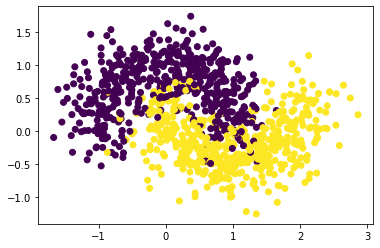

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#making DecisionTree
dt=DecisionTreeClassifier(random_state=100)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

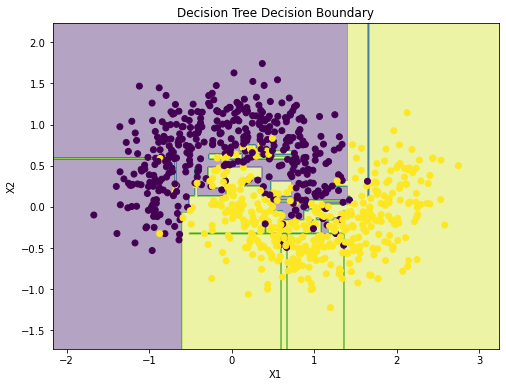

In [ ]:
import numpy as np

#plotting DT
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Decision Tree Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Best Parameters:  {'max_depth': 2}
Training Accuracy:  0.90125
Testing Accuracy:  0.88


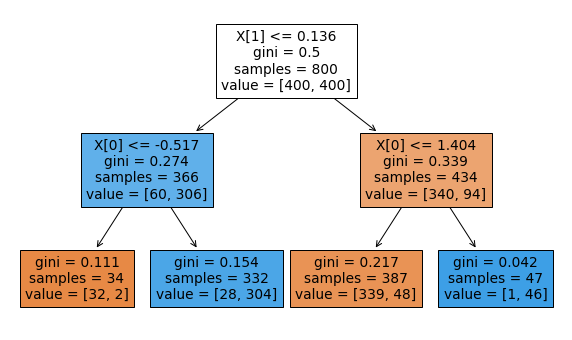

In [ ]:
from sklearn.model_selection import GridSearchCV

#Perform hyperparameter tuning for finding the best value of max_depth

param_grid = {'max_depth':  np.array(list(range(1,25)))}
best_hy_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, cv=5)
best_hy_dt.fit(X_train, y_train)

print("Best Parameters: ", best_hy_dt.best_params_)
print("Training Accuracy: ", accuracy_score(y_train, best_hy_dt.predict(X_train)))
print("Testing Accuracy: ", accuracy_score(y_test, best_hy_dt.predict(X_test)))

plt.figure(figsize=(10,6))
plot_tree(best_hy_dt.best_estimator_, filled=True)
plt.show()

Training accuracy:  0.98
Test accuracy:  0.905


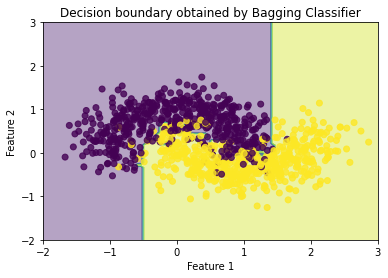

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), random_state=100,n_estimators=12)
bag_tree.fit(X_train, y_train)

# Accuracy
train_accuracy = bag_tree.score(X_train, y_train)
test_accuracy = bag_tree.score(X_test, y_test)
print('Training accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

# Plotting decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 3, 100))
Z = bag_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary obtained by Bagging Classifier')
plt.show()

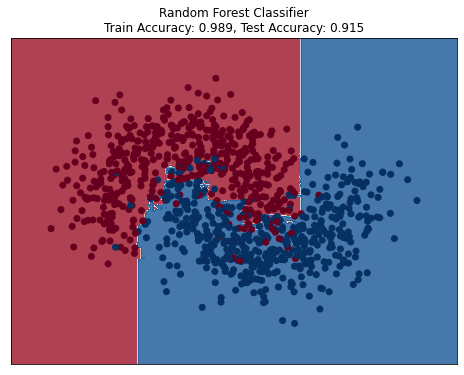

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
randforest.fit(X_train, y_train)

# Accuracy
rf_train_acc = accuracy_score(y_train, randforest.predict(X_train))
rf_test_acc = accuracy_score(y_test, randforest.predict(X_test))



# Plotting decision boundary
plt.figure(figsize=(8,6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = randforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z ,cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.RdBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Random Forest Classifier\nTrain Accuracy: {:.3f}, Test Accuracy: {:.3f}'.format(rf_train_acc, rf_test_acc))
plt.show()

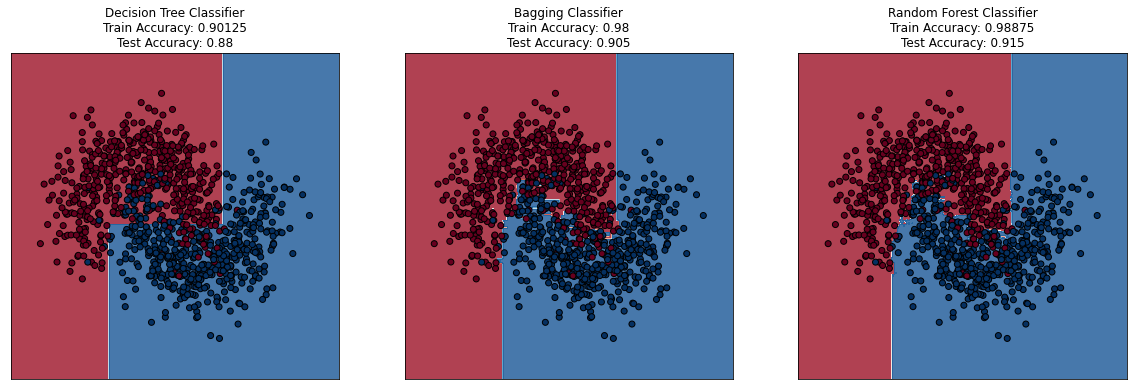

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plot_decision_boundary(best_hy_dt, X, y)
plt.title('Decision Tree Classifier\nTrain Accuracy: ' + str(accuracy_score(y_train, best_hy_dt.predict(X_train))) + '\nTest Accuracy: ' + str(accuracy_score(y_test, best_hy_dt.predict(X_test))))

plt.subplot(1,3,2)
plot_decision_boundary(bag_tree, X, y)
plt.title('Bagging Classifier\nTrain Accuracy: ' + str(accuracy_score(y_train, bag_tree.predict(X_train))) + '\nTest Accuracy: ' + str(accuracy_score(y_test, bag_tree.predict(X_test))))

plt.subplot(1,3,3)
plot_decision_boundary(randforest, X, y)
plt.title('Random Forest Classifier\nTrain Accuracy: ' + str(accuracy_score(y_train, randforest.predict(X_train))) + '\nTest Accuracy: ' + str(accuracy_score(y_test, randforest.predict(X_test))))

plt.show()


Best accuracy order of Train_data - Random Forest > Bagging Classifier > Decision Tree

Best accuracy order of Test_data - Random Forest > Bagging Classifier > Decision Tree

We can see Decision Tree has high bias, Bagging Tree is somewhat overfitting and Random Forest is the best

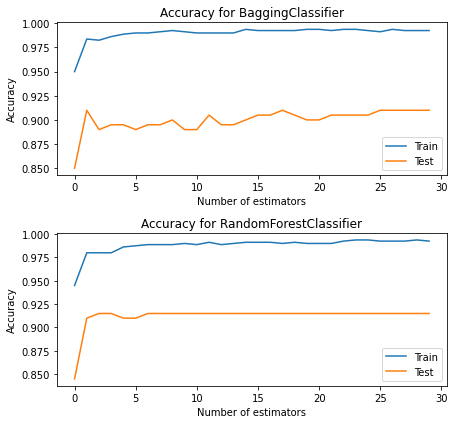

bst_train_randforest_accuracy:  0.99375
bst_test_randforest_accuracy:  0.915
bst_train_bag_tree_accuracy:  0.99375
bst_test_bag_tree_accuracy:  0.91


In [ ]:
Accuracy_array_bag_tree_Train = []
Accuracy_array_bag_tree_Test = []
Accuracy_array_randomforest_Train = []
Accuracy_array_randomforest_Test = []
bst_train_bag_accuracy=0
bst_test_bag_accuracy=0
bst_test_randforest_accuracy=0
bst_train_randforest_accuracy=0
for estimators in range(1, 301, 10):
    bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), random_state=100, n_estimators=estimators)
    bag_tree.fit(X_train, y_train)
    bag_tree_train_accuracy = accuracy_score(y_train, bag_tree.predict(X_train))
    bag_tree_test_accuracy = accuracy_score(y_test, bag_tree.predict(X_test))
    Accuracy_array_bag_tree_Train.append(bag_tree_train_accuracy)
    Accuracy_array_bag_tree_Test.append(bag_tree_test_accuracy)
    bst_train_bag_accuracy=max(bst_train_bag_accuracy,bag_tree_train_accuracy)
    bst_test_bag_accuracy=max(bst_test_bag_accuracy,bag_tree_test_accuracy)

        

    randforest = RandomForestClassifier(n_estimators=estimators, max_depth=10, random_state=42)
    randforest.fit(X_train, y_train)
    randforest_train_accuracy = accuracy_score(y_train, randforest.predict(X_train))
    randforest_test_accuracy = accuracy_score(y_test, randforest.predict(X_test))
    Accuracy_array_randomforest_Train.append(randforest_train_accuracy)
    Accuracy_array_randomforest_Test.append(randforest_test_accuracy)
    bst_train_randforest_accuracy=max(bst_train_randforest_accuracy,randforest_train_accuracy)
    bst_test_randforest_accuracy=max(bst_test_randforest_accuracy,randforest_test_accuracy)


# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(Accuracy_array_bag_tree_Train, label='Train')
plt.plot( Accuracy_array_bag_tree_Test, label='Test')
plt.title('Accuracy for BaggingClassifier')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot( Accuracy_array_randomforest_Train, label='Train')
plt.plot( Accuracy_array_randomforest_Test, label='Test')
plt.title('Accuracy for RandomForestClassifier')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("bst_train_randforest_accuracy: ",bst_train_randforest_accuracy)
print("bst_test_randforest_accuracy: ",bst_test_randforest_accuracy)
print("bst_train_bag_tree_accuracy: ",bst_train_bag_accuracy)
print("bst_test_bag_tree_accuracy: ",bst_test_bag_accuracy)

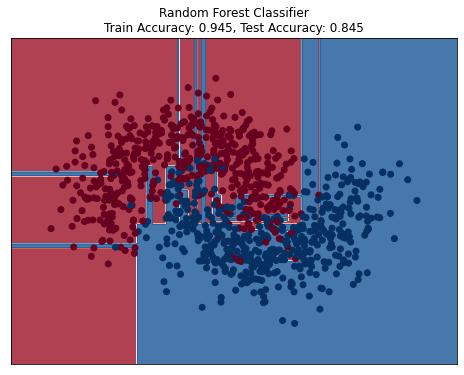

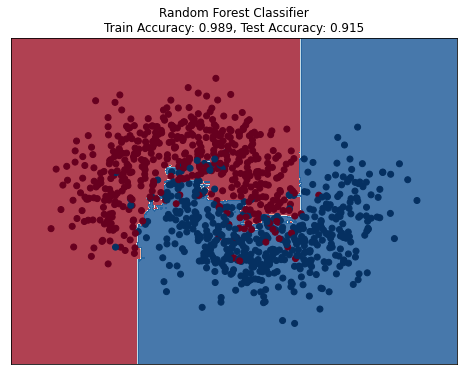

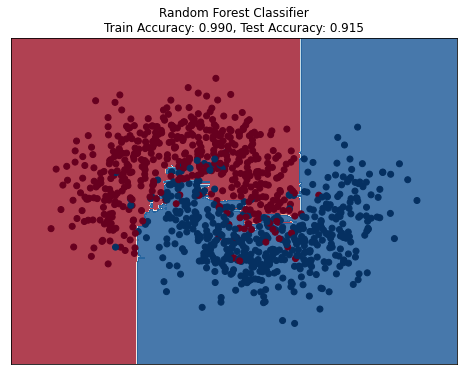

In [ ]:
for estimator in range(1,301,100):
    randforest = RandomForestClassifier(n_estimators=estimator, max_depth=10, random_state=42)
    randforest.fit(X_train, y_train)
    
    # Accuracy
    rf_train_acc = accuracy_score(y_train, randforest.predict(X_train))
    rf_test_acc = accuracy_score(y_test, randforest.predict(X_test))
    
    
    
    # Plotting decision boundary
    plt.figure(figsize=(8,6))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = randforest.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z ,cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('Random Forest Classifier\nTrain Accuracy: {:.3f}, Test Accuracy: {:.3f}'.format(rf_train_acc, rf_test_acc))
    plt.show()

Training accuracy:  0.95
Test accuracy:  0.85


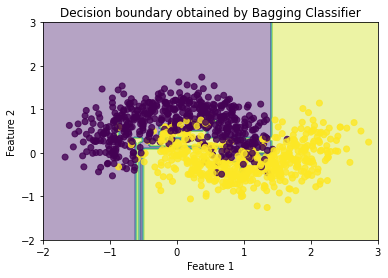

Training accuracy:  0.99
Test accuracy:  0.89


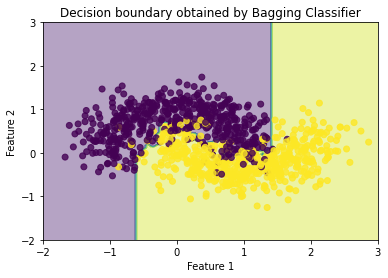

Training accuracy:  0.99375
Test accuracy:  0.9


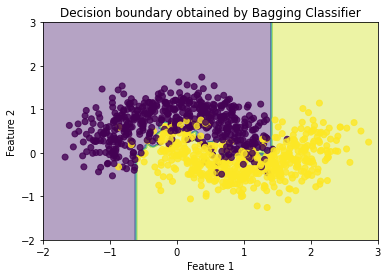

In [ ]:
for estimator in range(1,301,100):
    bag_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), random_state=100,n_estimators=estimator)
    bag_tree.fit(X_train, y_train)

    # Accuracy
    train_accuracy = bag_tree.score(X_train, y_train)
    test_accuracy = bag_tree.score(X_test, y_test)
    print('Training accuracy: ', train_accuracy)
    print('Test accuracy: ', test_accuracy)

    # Plotting decision boundary
    xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 3, 100))
    Z = bag_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision boundary obtained by Bagging Classifier')
    plt.show()

From The Accuracy we can clearly see that it sometimes up and down but on long run it clearly increases

The best accuracy we get are:

bst_train_randforest_accuracy:  0.99375

bst_test_randforest_accuracy:  0.915

bst_train_bag_tree_accuracy:  0.99375

bst_test_bag_tree_accuracy:  0.91

We can see the randomforest and bag_tree accuracy get equal at high estimators value in train set

We can see the randomforest accuracy is greater than bag_tree accuracy at high estimators value in test set

From plots of both bag_tree and random forest we can see that the boundary becomes more and more complex as n_estimators value increases


##Part 2

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

class Bagging:
    def __init__(self, n_estimators=10):
        """
        Initialize the bagging with n_estimators (We are using bootstrap aggregation here)
        """
        self.n_estimators = n_estimators
        self.trees = []
        self.y_pred = []
        self.y_test = None
        self.X_test = None
        self.seeding=13

    def get_sample(self,X_train,y_train): 
        """
        From the given data get a random sample of same size & we know from jury thorem that it accounts for about 63% of the data
        """
        sample = []
        y_sampl=[]
        for i in range(len(X_train)):
            n_samples = len(X_train)
            random.seed(self.seeding)
            self.seeding+=58
            sample_indices = np.random.choice(n_samples, size=n_samples, replace=True)
            index = random.randint(0, len(X_train)-1)
            sample.append(X_train[index])
            y_sampl.append(y_train[index])
            
        return sample,y_sampl

    def fit(self, X_train, y_train): 
        """
        fit the data by training X_train and y_train on n_estimators number of trees
        """
        for i in range(self.n_estimators):
            sample,y_sampl = self.get_sample(X_train,y_train)
            tree = DecisionTreeClassifier()
            tree.fit(sample,y_sampl)
            self.trees.append(tree)

    def predict(self, X_test):
        """
        Using fitted n_estimators trees predict the y_test then take the mean of all the predictions and round it off to get the final prediction
        """
        y_pred = []
        for tree in self.trees:
            pred=tree.predict(X_test)
            y_pred.append(pred)
            self.y_pred.append(pred)
        y_pred = np.array(y_pred)
        y_pred = np.mean(y_pred, axis=0)
        y_pred = np.round(y_pred)
        return y_pred

    def accuracy(self, X_test, y_test):
        """
        Calculate the accuracy of the model by the use of predict function
        """
        self.X_test = X_test
        self.y_test = y_test
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

    def performance_per_tree(self):
        """
        Print the accuracy of each tree along with the decision boundary of each tree
        """
        if self.y_pred is None or self.y_test is None:
            print("Please run the accuracy function first")
            return

        accuracy_tree = []
        fig, axes = plt.subplots((self.n_estimators//2), 2, figsize=(8, 15))
        for i, tree in enumerate(self.trees):
            y_pred = self.y_pred[i]
            acc = np.mean(y_pred == self.y_test)
            accuracy_tree.append(acc)
            xx, yy = np.meshgrid(np.linspace(self.X_test[:, 0].min(), self.X_test[:, 0].max(), 100),
                                 np.linspace(self.X_test[:, 1].min(), self.X_test[:, 1].max(), 100))
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            axes[i//2, i%2].contourf(xx, yy, Z, alpha=0.4)
            axes[i//2, i%2].scatter(self.X_test[:, 0], self.X_test[:, 1], c=y_pred, cmap=plt.cm.RdBu, alpha=0.8)
            axes[i//2, i%2].set_title("Tree {} with accuracy {}".format(i+1, acc))
            axes[i//2, i%2].set_xlabel('Feature 1')
            axes[i//2, i%2].set_ylabel('Feature 2')
            axes[i//2, i%2].set_xlim(xx.min(), xx.max())
            axes[i//2, i%2].set_ylim(yy.min(), yy.max())
            axes[i//2, i%2].set_xticks(())
            axes[i//2, i%2].set_yticks(())
        print("Average accuracy of trees is: ",np.mean(acc))
        plt.tight_layout()
        plt.show()



In [ ]:
bag_tree=Bagging(n_estimators=10)
bag_tree.fit(X_train,y_train)
bag_tree.accuracy(X_test,y_test)

0.92

Average accuracy of trees is:  0.9


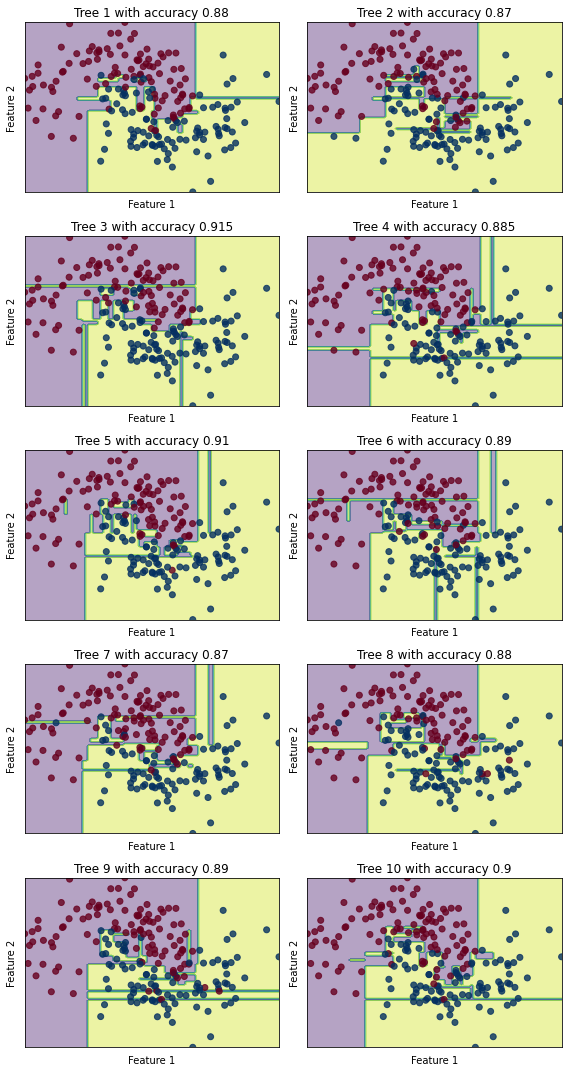

In [ ]:
bag_tree.performance_per_tree()

The average accuracy of all the trees is 0.915 whereas for bagging it is 0.935

Bagging accuracy > Average accuracy of all trees

#Problem 2

##Part 1

In [ ]:
!pip install xgboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# train adaboost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

##Part 2

In [ ]:
#train xgboost
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(n_estimators=100, random_state=42,subsample=0.7)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

##Part 3

In [ ]:
ada_train_pred = ada.predict(X_train)
ada_test_pred = ada.predict(X_test)
print("AdaBoost Classifier Accuracy on training set: ", accuracy_score(ada_train_pred,y_train))
print("AdaBoost Classifier Accuracy on test set: ", accuracy_score(ada_test_pred,y_test))

print()

xgb_train_pred = xgb_clf.predict(X_train)
xgb_test_pred = xgb_clf.predict(X_test)
print("XGBoost Classifier Accuracy on training set: ", accuracy_score(xgb_train_pred,y_train))
print("XGBoost Classifier Accuracy on test set: ", accuracy_score(xgb_test_pred,y_test))

AdaBoost Classifier Accuracy on training set:  0.9475
AdaBoost Classifier Accuracy on test set:  0.91

XGBoost Classifier Accuracy on training set:  0.9925
XGBoost Classifier Accuracy on test set:  0.905


##Part 4

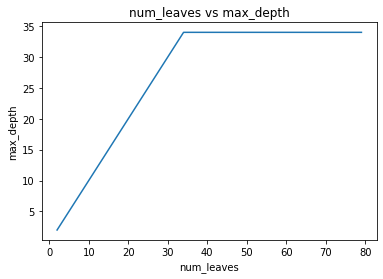

In [ ]:
max_depths = []
num_leaf1=[]
train_acc=[]
test_acc=[]
for num_leaves in range(2,32,1):
    # params for num_leaves
    num_leaf1.append(num_leaves)
    params={}
    lgb_clf = lgb.LGBMClassifier(num_leaves=num_leaves, random_state=42)
    lgb_clf.fit(X_train, y_train)

    train_pred=np.round(lgb_clf.predict(X_train))
    train_acc.append(np.mean(train_pred==y_train))
    test_pred=np.round(lgb_clf.predict(X_test))
    test_acc.append(np.mean(test_pred==y_test))

num_leaf2=[]
for num_leaves in range(2,80,1):
    num_leaf2.append(num_leaves)
    # params for num_leaves
    params={}
    params['num_leaves'] = num_leaves
    model = lgb.train(params, lgb.Dataset(X_train, y_train))
    max_depth = max([tree['num_leaves'] for tree in model.dump_model()['tree_info']])
    max_depths.append(max_depth)

#Plot of num_leaves vs max_depth
plt.plot(num_leaf2, max_depths)
plt.xlabel('num_leaves')
plt.ylabel('max_depth')
plt.title('num_leaves vs max_depth')
plt.show()

##Part 5

We can see as num_leaves increases depth also increases linearly but after a certain num_leaves max_depth do not increase this is due to the creation of pure leaf i.e. a leaf where the data contains only one category of data

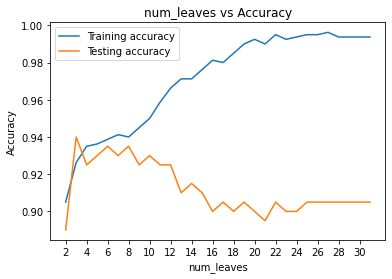

In [ ]:
# Plotting num_leaves vs accuracy
plt.figure()
plt.plot(num_leaf1, train_acc, label='Training accuracy')
plt.plot(num_leaf1, test_acc, label='Testing accuracy')
plt.xlabel('num_leaves')
plt.ylabel('Accuracy')
plt.title('num_leaves vs Accuracy')
plt.legend()
plt.xticks(num_leaf1[::2]) 
plt.show()

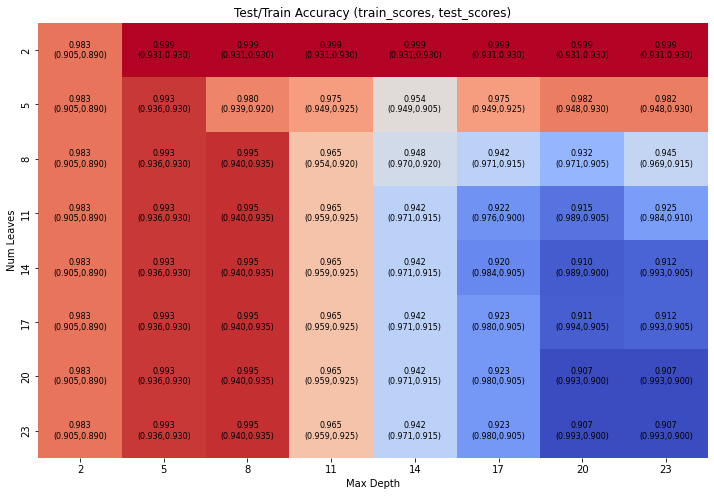

In [ ]:
# for depth in range(2,45,15):
#     for leaves in range(2,100,25):
#         lgb_clf = lgb.LGBMClassifier(num_leaves=leaves, max_depth=depth, random_state=42)
#         lgb_clf.fit(X_train, y_train)
#         lgb_train_pred = lgb_clf.predict(X_train)
#         lgb_test_pred = lgb_clf.predict(X_test)
#         print("num_leaves=", leaves, ", max_depth=", depth, "acc on train=", accuracy_score(y_train, lgb_train_pred), ",acc on test=", accuracy_score(y_test, lgb_test_pred))
#         # print("Accuracy on training set: ", accuracy_score(lgb_train_pred,y_train))
#         # print("Accuracy on test set: ", accuracy_score(lgb_test_pred,y_test))
#         # print()

max_depths = np.arange(2, 25, 3)
num_leaves = np.arange(2, 25, 3)
train_scores = np.zeros((len(max_depths), len(num_leaves)))
test_scores = np.zeros((len(max_depths), len(num_leaves)))
test_by_train= np.zeros((len(max_depths), len(num_leaves)))
for i, depth in enumerate(max_depths):
    for j, leaves in enumerate(num_leaves):
        lgb_clf = lgb.LGBMClassifier(num_leaves=leaves, max_depth=depth, random_state=42)
        lgb_clf.fit(X_train, y_train)
        lgb_train_pred = lgb_clf.predict(X_train)
        lgb_test_pred = lgb_clf.predict(X_test)
        train_scores[i, j] = accuracy_score(y_train, lgb_train_pred)
        test_scores[i, j] = accuracy_score(y_test, lgb_test_pred)
        test_by_train[i, j]=test_scores[i, j]/train_scores[i, j]

data = pd.DataFrame(data={'num_leaves': num_leaves.repeat(len(max_depths)),
                          'max_depth': np.tile(max_depths, len(num_leaves)),
                          'test_by_train': test_by_train.flatten(),
                          'train_scores': train_scores.flatten(),
                          'test_scores': test_scores.flatten()})

data = data.pivot('num_leaves', 'max_depth', 'test_by_train')
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data, cmap='coolwarm', cbar=False, ax=ax)

for (i, j), value in np.ndenumerate(data):
    train_score = train_scores[i, j]
    test_score = test_scores[i, j]
    plt.text(j + 0.5, i + 0.5, f"{value:.3f}\n({train_score:.3f},{test_score:.3f})", 
             ha='center', va='center', color='black', fontsize=8)

plt.xlabel('Max Depth')
plt.ylabel('Num Leaves')
plt.title('Test/Train Accuracy (train_scores, test_scores)')
plt.show()

From num_leaves vs Accuracy plot we can see the model starts overfitting after num_leaves=8 and max_depth=8

From above heatmap also we can see the same result

##Part 6

num_leaves: This decides how many leaves will be in a tree. If we increase num_leaves, it can make the prediction better.

max_depth: High depth can also lead to overfitting.But it will increase the accuracy

min_data_in_leaf: This parameter sets the minimum number of samples required to be at a leaf node. If we increase this value, we will have less overfitting for each leaf, which can help to prevent overfitting.

feature_fraction: This decides how much features we want to use in each tree. If we lower this value, we will have less overfitting, which can help we to prevent overfitting.

lambda_l1 and lambda_l2: These parameters decide L1 and L2 regularization, respectively. If we set non-zero values for lambda_l1 and lambda_l2, it can help us to prevent overfitting.

##Part 7

In [ ]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='g')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

In [ ]:
ada_train_pred = ada.predict(X_train)
ada_test_pred = ada.predict(X_test)
print("AdaBoost Classifier Accuracy on training set: ", accuracy_score(ada_train_pred,y_train))
print("AdaBoost Classifier Accuracy on test set: ", accuracy_score(ada_test_pred,y_test))

print()

xgb_train_pred = xgb_clf.predict(X_train)
xgb_test_pred = xgb_clf.predict(X_test)
print("XGBoost Classifier Accuracy on training set: ", accuracy_score(xgb_train_pred,y_train))
print("XGBoost Classifier Accuracy on test set: ", accuracy_score(xgb_test_pred,y_test))

AdaBoost Classifier Accuracy on training set:  0.9475
AdaBoost Classifier Accuracy on test set:  0.91

XGBoost Classifier Accuracy on training set:  0.9925
XGBoost Classifier Accuracy on test set:  0.905


In [ ]:
lgb_clf = lgb.LGBMClassifier(random_state=42)
lgb_clf.fit(X_train, y_train)

params = {'num_leaves': [10, 20, 30, 40], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(lgb.LGBMClassifier(random_state=42), params, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

lgb_clf = lgb.LGBMClassifier(**grid_search.best_params_, random_state=42)
lgb_clf.fit(X_train, y_train)
lgb_train_pred = lgb_clf.predict(X_train)
lgb_test_pred = lgb_clf.predict(X_test)
print("LightGBM Classifier Accuracy on training set: ", accuracy_score(lgb_train_pred, y_train))
print("LightGBM Classifier Accuracy on test set: ", accuracy_score(lgb_test_pred, y_test))

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'num_leaves': 10}
LightGBM Classifier Accuracy on training set:  0.9375
LightGBM Classifier Accuracy on test set:  0.93


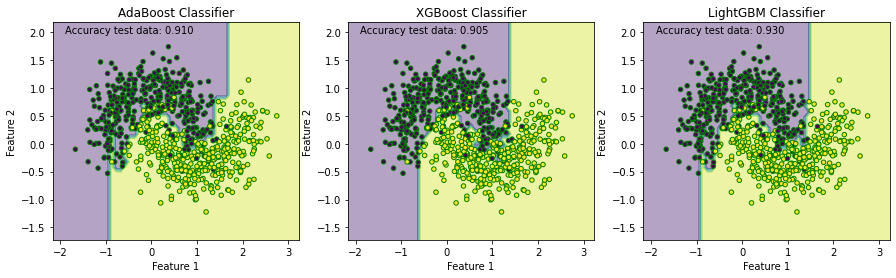

In [ ]:
# Plotting decision boundaries for all 3 models
plt.figure(figsize=(15, 4))

# AdaBoost Classifier
plt.subplot(131)
plot_decision_boundary(ada, X_train, y_train)
plt.title("AdaBoost Classifier")
plt.text(0.05, 0.95, "Accuracy test data: {:.3f}".format(accuracy_score(ada_test_pred, y_test)), transform=plt.gca().transAxes)

# XGBoost Classifier
plt.subplot(132)
plot_decision_boundary(xgb_clf, X_train, y_train)
plt.title("XGBoost Classifier")
plt.text(0.05, 0.95, "Accuracy test data: {:.3f}".format(accuracy_score(xgb_test_pred, y_test)), transform=plt.gca().transAxes)

# LightGBM Classifier with best_param obtained from GridSearchCV
plt.subplot(133)
plot_decision_boundary(lgb_clf, X_train, y_train)
plt.title("LightGBM Classifier")
plt.text(0.05, 0.95, "Accuracy test data: {:.3f}".format(accuracy_score(lgb_test_pred, y_test)), transform=plt.gca().transAxes)

plt.show()

AdaBoost Classifier Accuracy on training set:  0.9475
 and on test set:  0.91

XGBoost Classifier Accuracy on training set:  0.9925
 and on test set:  0.905

LightGBM Classifier Accuracy on training set:  0.9375
 and on test set:  0.93

We can clearly see that accuracy/performance is LightGBM>AdaBoost>XGBoost

#Question 3

In [ ]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Tuning hyperparameters using GridSearchCV
params = {'var_smoothing': [1e-19,1e-16,1e-13,1e-10, 1e-7]}
grid_search = GridSearchCV(gnb, params, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

gnb = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])
gnb.fit(X_train, y_train)

gnb_train_pred = gnb.predict(X_train)
gnb_test_pred = gnb.predict(X_test)

# Accuracy
print("Gaussian Naive Bayes Classifier Accuracy on training set: ", accuracy_score(gnb_train_pred,y_train))
print("Gaussian Naive Bayes Classifier Accuracy on test set: ", accuracy_score(gnb_test_pred,y_test))


Best parameters found: {'var_smoothing': 1e-19}
Gaussian Naive Bayes Classifier Accuracy on training set:  0.86
Gaussian Naive Bayes Classifier Accuracy on test set:  0.82


In [ ]:
from sklearn.ensemble import VotingClassifier

voter=VotingClassifier(estimators=[('ada', ada), ('random_forest', randforest), ('lgb', lgb_clf), ('bayes', gnb)])
voter.fit(X_train, y_train)
voter_train_pred = voter.predict(X_train)
voter_test_pred = voter.predict(X_test)

print("Voting Classifier Accuracy on training set: ", accuracy_score(voter_train_pred, y_train))
print("Voting Classifier Accuracy on test set: ", accuracy_score(voter_test_pred, y_test))

Voting Classifier Accuracy on training set:  0.95125
Voting Classifier Accuracy on test set:  0.915


In [ ]:
average_train_acc_by_ada_randomforest_lightgbm = np.mean([accuracy_score(ada_train_pred, y_train), 
                                                     rf_train_acc, 
                                                     accuracy_score(lgb_train_pred, y_train)])
average_test_acc_by_ada_randomforest_lightgbm = np.mean([accuracy_score(ada_test_pred, y_test), 
                                                    rf_test_acc , 
                                                    accuracy_score(lgb_test_pred, y_test)])

print("Average train accuracy by AdaBoost, randomforest, LightGBM: ", average_train_acc_by_ada_randomforest_lightgbm)
print("Average test accuracy by AdaBoost, randomforest, LightGBM: ", average_test_acc_by_ada_randomforest_lightgbm)

Average train accuracy by AdaBoost, randomforest, LightGBM:  0.9583333333333334
Average test accuracy by AdaBoost, randomforest, LightGBM:  0.9183333333333334


Voting Classifier Accuracy on training set:  0.9475 and on test set:  0.915

Average Accuracy on training set by AdaBoost, Randomforst, LightGBM:  0.95833 and and on testing set:  0.91833

AdaBoost Classifier Accuracy on training set: 0.9475 and on test set: 0.91

Random Forest Accuracy on training set: 0.95125 and on test set: 0.915

LightGBM Classifier Accuracy on training set: 0.9375 and on test set: 0.93

In comparison to the three model it has both train_accuracy and test_accuracy good